# Homework 3: Machine Learning for Classification

https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/03-classification/homework.md

In [138]:
import pandas as pd
import numpy as np
import wget
import seaborn as sns
import matplotlib.pyplot as plt


In [139]:
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [140]:
df = df.drop(columns=['default', 'loan'])
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [141]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [142]:
df.describe().round()

,age,balance,day,duration,campaign,pdays,previous
count,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0
mean,41.0,1362.0,16.0,258.0,3.0,40.0,1.0
std,11.0,3045.0,8.0,258.0,3.0,100.0,2.0
min,18.0,-8019.0,1.0,0.0,1.0,-1.0,0.0
25%,33.0,72.0,8.0,103.0,1.0,-1.0,0.0
50%,39.0,448.0,16.0,180.0,2.0,-1.0,0.0
75%,48.0,1428.0,21.0,319.0,3.0,-1.0,0.0
max,95.0,102127.0,31.0,4918.0,63.0,871.0,275.0


In [143]:
# What is the most frequent observation (mode) for the column education?
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [144]:
df.education.mode()

0    secondary
Name: education, dtype: object

In [145]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [146]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [147]:
numerical_vars = df.select_dtypes(include=['int64', 'float64'])
categorical_vars = df.select_dtypes(include=['object'])

In [148]:
print(f"Campos númericos:  {numerical_vars.columns}")
print(f"\nCampos categóricos:  {categorical_vars.columns}")


Campos númericos:  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Campos categóricos:  Index(['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome', 'y'],
      dtype='object')


In [149]:
correlation_matrix = numerical_vars.corr()
correlation_matrix.round(4)

,age,balance,day,duration,campaign,pdays,previous
age,1.0000,0.0978,-0.0091,-0.0046,0.0048,-0.0238,0.0013
balance,0.0978,1.0000,0.0045,0.0216,-0.0146,0.0034,0.0167
day,-0.0091,0.0045,1.0000,-0.0302,0.1625,-0.0930,-0.0517
duration,-0.0046,0.0216,-0.0302,1.0000,-0.0846,-0.0016,0.0012
campaign,0.0048,-0.0146,0.1625,-0.0846,1.0000,-0.0886,-0.0329
pdays,-0.0238,0.0034,-0.0930,-0.0016,-0.0886,1.0000,0.4548
previous,0.0013,0.0167,-0.0517,0.0012,-0.0329,0.4548,1.0000


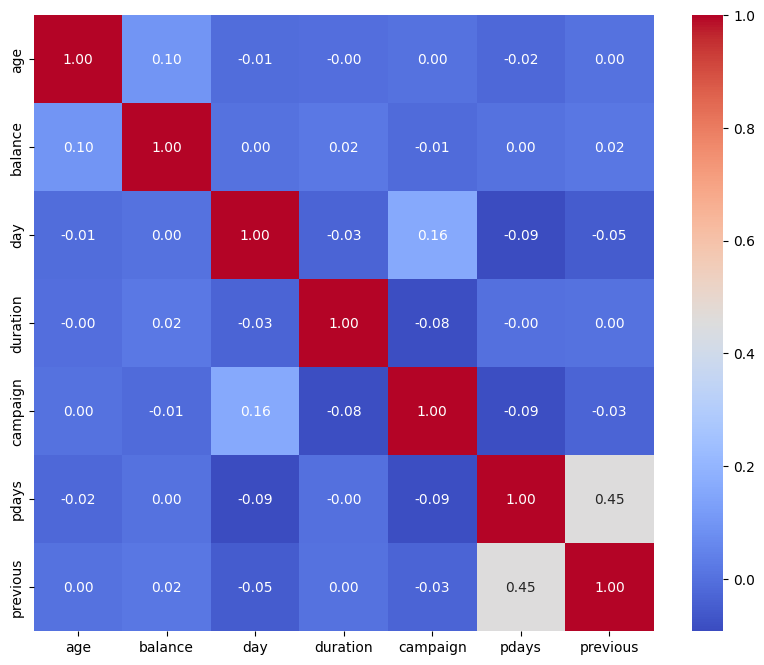

In [150]:
# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [151]:
# Now we want to encode the y variable
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [152]:
# Reemplazar 'yes' con 1 y 'no' con 0 en la columna 'y'
df.y = (df.y == "yes").astype(int)

In [153]:
df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [154]:
from sklearn.model_selection import train_test_split
# Split your data in train/val/test sets with 60%/20%/20% distribution.
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [155]:
df_train, df_val = train_test_split(df_train_full, test_size=0.5, random_state=42)

In [156]:
y_train = df_train.y.values
y_val = df_val.y.values
del df_train['y']
del df_val['y']

In [157]:
len(df)

45211

In [158]:
len(df_train),len(df_val),len(df_test)

(18084, 18084, 9043)

In [159]:
from sklearn.metrics import mutual_info_score

In [160]:
def mutual_info_y_score(series):
    return mutual_info_score(series, df.y)

In [161]:
mi = categorical_vars.apply(mutual_info_y_score)
mi.sort_values(ascending=False).round(2)

y            0.36
poutcome     0.03
month        0.02
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64

In [162]:
categorical_vars = categorical_vars.drop(columns=['y'])

In [163]:
numerical_vars.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [164]:
# Hay 40 columnas categorics con OneHotEncoder
categorical_vars.nunique().sum()

40

In [165]:
from sklearn.feature_extraction import DictVectorizer

In [166]:
train_dict = df_train.to_dict(orient='records')

In [167]:
train_dict[0]

{'age': 46,
 'job': 'blue-collar',
 'marital': 'single',
 'education': 'secondary',
 'balance': 332,
 'housing': 'no',
 'contact': 'cellular',
 'day': 30,
 'month': 'jan',
 'duration': 11,
 'campaign': 4,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [168]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [169]:
X_train = dv.transform(train_dict)

In [170]:
X_train.shape

(18084, 47)

In [171]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [34]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [86]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [87]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [88]:
y_pred = model.predict_proba(X_val)[:,1]


In [89]:
results_y_predic = (y_pred >= 0.5)

In [90]:
results_y_predic = results_y_predic.astype(int)

In [91]:
(y_val == results_y_predic).mean().round(2)

0.9

In [92]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = results_y_predic.astype(int)
df_pred['actual'] = y_val

In [93]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [94]:
df_pred

,probability,prediction,actual,correct
0,0.010722,0,0,True
1,0.012135,0,0,True
2,0.135863,0,1,False
3,0.182334,0,0,True
4,0.430000,0,1,False
...,...,...,...,...
18079,0.197750,0,0,True
18080,0.969211,1,1,True
18081,0.198739,0,0,True
18082,0.019879,0,0,True


In [131]:
original_accuracy = df_pred['correct'].mean()
original_accuracy

0.902731696527317

In [96]:
model.coef_[0].round(3)

array([-3.000e-03,  0.000e+00, -7.300e-02,  2.160e-01,  9.700e-02,
       -1.139e+00, -0.000e+00,  4.000e-03, -3.880e-01, -2.480e-01,
       -4.000e-02, -1.490e-01, -1.500e-02, -8.100e-01,  8.100e-02,
       -3.020e-01, -1.790e-01, -1.810e-01, -8.800e-02,  3.500e-01,
       -2.060e-01, -2.380e-01,  2.150e-01, -1.910e-01,  3.800e-02,
       -1.260e-01, -2.820e-01, -4.370e-01, -1.060e-01,  2.380e-01,
       -6.400e-01,  2.430e-01, -2.840e-01, -6.380e-01, -8.610e-01,
        1.750e-01,  8.030e-01, -3.880e-01, -8.150e-01,  7.040e-01,
        6.390e-01, -1.000e-03, -7.560e-01, -4.650e-01,  1.546e+00,
       -1.149e+00,  2.000e-03])

In [97]:
dv_dict = dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))
dv_dict

{'age': -0.003,
 'balance': 0.0,
 'campaign': -0.073,
 'contact=cellular': 0.216,
 'contact=telephone': 0.097,
 'contact=unknown': -1.139,
 'day': -0.0,
 'duration': 0.004,
 'education=primary': -0.388,
 'education=secondary': -0.248,
 'education=tertiary': -0.04,
 'education=unknown': -0.149,
 'housing=no': -0.015,
 'housing=yes': -0.81,
 'job=admin.': 0.081,
 'job=blue-collar': -0.302,
 'job=entrepreneur': -0.179,
 'job=housemaid': -0.181,
 'job=management': -0.088,
 'job=retired': 0.35,
 'job=self-employed': -0.206,
 'job=services': -0.238,
 'job=student': 0.215,
 'job=technician': -0.191,
 'job=unemployed': 0.038,
 'job=unknown': -0.126,
 'marital=divorced': -0.282,
 'marital=married': -0.437,
 'marital=single': -0.106,
 'month=apr': 0.238,
 'month=aug': -0.64,
 'month=dec': 0.243,
 'month=feb': -0.284,
 'month=jan': -0.638,
 'month=jul': -0.861,
 'month=jun': 0.175,
 'month=mar': 0.803,
 'month=may': -0.388,
 'month=nov': -0.815,
 'month=oct': 0.704,
 'month=sep': 0.639,
 'pdays':

In [175]:
c_values = [0.01, 0.1, 1, 10, 100]
results = {}

In [180]:

for C in c_values:
    model = LogisticRegression(C=C, solver='liblinear',max_iter=1000, random_state=42)  # Usar 'liblinear' para datos pequeños
    model.fit(X_train, y_train)  # Entrenar el modelo
    
    y_pred = model.predict_proba(X_train)[:,1]
    results_y_predic = (y_pred >= 0.5)
    results_y_predic = results_y_predic.astype(int)
    accuracy = (y_val == results_y_predic).mean().round(2) 
    
    results[C] = accuracy
   
print("\nResultados de precisión para cada valor de C:")
for C, accuracy in results.items():
    print(f'C={C}: Accuracy={accuracy:.4f}')


Resultados de precisión para cada valor de C:
C=0.01: Accuracy=0.8500
C=0.1: Accuracy=0.8400
C=1: Accuracy=0.8400
C=10: Accuracy=0.8400
C=100: Accuracy=0.8400


Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

- age
- balance
- marital
- previous

In [98]:
small = ['age','balance','marital','previous']

In [99]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'age': 46, 'balance': 332, 'marital': 'single', 'previous': 0},
 {'age': 46, 'balance': 329, 'marital': 'married', 'previous': 0},
 {'age': 40, 'balance': 540, 'marital': 'married', 'previous': 0},
 {'age': 51, 'balance': 5403, 'marital': 'married', 'previous': 0},
 {'age': 51, 'balance': 3899, 'marital': 'married', 'previous': 0},
 {'age': 43, 'balance': 0, 'marital': 'single', 'previous': 0},
 {'age': 26, 'balance': 372, 'marital': 'single', 'previous': 2},
 {'age': 31, 'balance': 538, 'marital': 'single', 'previous': 0},
 {'age': 43, 'balance': 36, 'marital': 'divorced', 'previous': 0},
 {'age': 37, 'balance': 275, 'marital': 'single', 'previous': 1}]

In [100]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [101]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [102]:
dv_small.get_feature_names_out()

array(['age', 'balance', 'marital=divorced', 'marital=married',
       'marital=single', 'previous'], dtype=object)

In [103]:
X_train_small = dv_small.transform(dicts_train_small)

In [104]:
small_model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
small_model.fit(X_train_small, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [105]:
w0 = small_model.intercept_[0]
w0

-1.7157113467876488

In [106]:
w = small_model.coef_[0]
w.round(3)

array([ 0.006,  0.   , -0.544, -0.843, -0.328,  0.099])

In [108]:
dv_small_dict = dict(zip(dv_small.get_feature_names_out(),w.round(3)))
dv_small_dict

{'age': 0.006,
 'balance': 0.0,
 'marital=divorced': -0.544,
 'marital=married': -0.843,
 'marital=single': -0.328,
 'previous': 0.099}

In [130]:
dv_small_keys = list(dv_small_dict.keys())
dv_small_keys

['age',
 'balance',
 'marital=divorced',
 'marital=married',
 'marital=single',
 'previous']

In [136]:
[(clave, dv_dict[clave]) for clave in dv_small_keys]

[('age', -0.003),
 ('balance', 0.0),
 ('marital=divorced', -0.282),
 ('marital=married', -0.437),
 ('marital=single', -0.106),
 ('previous', 0.002)]